# Bacias Hidrográficas do Brasil e o bioma do Cerrado

### # Importando módulos

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
import warnings
warnings.filterwarnings('ignore')

### # Fonte dos dados

In [3]:
# fontes dos dados https://www.ibge.gov.br/geociencias/informacoes-ambientais/estudos-ambientais/31653-bacias-e-divisoes-hidrograficas-do-brasil.html?=&t=downloads

## Parte I: Importando base de dados

In [4]:
cerrado = gpd.read_file('dados/CERRADO.shp')
cerrado.head()

,id,version,name,source,inserted_a,updated_at,category,category_n,area_ha,geometry
0,18415,1,CERRADO,IBGE,2020-02-07,2020-02-07,refined_biome,Bioma Refinado,1.984568e+08,"POLYGON ((-43.39009 -2.33937, -43.38741 -2.342..."


In [5]:
bacias = gpd.read_file('dados/macro_RH.shp')
bacias.head()

,fid,id,cd_macroRH,nm_macroRH,area,geometry
0,1.0,31,101,AMAZÔNICA,3.826063e+06,"MULTIPOLYGON (((-60.45063 -13.88568, -60.45060..."
1,2.0,67,102,TOCANTINS-ARAGUAIA,9.381124e+05,"POLYGON ((-52.84597 -17.70442, -52.84598 -17.7..."
2,3.0,50,103,ATLÂNTICO NORDESTE OCIDENTAL,2.721961e+05,"MULTIPOLYGON (((-44.31772 -2.78767, -44.31605 ..."
3,4.0,279,104,PARNAÍBA,3.372808e+05,"POLYGON ((-40.78513 -6.53014, -40.78505 -6.530..."
4,5.0,1,105,ATLÂNTICO NORDESTE ORIENTAL,2.817815e+05,"MULTIPOLYGON (((-36.38909 -10.50091, -36.38958..."


## Parte II: Tratando e entendendo base de dados

In [6]:
bacias['nm_macroRH'] = bacias['nm_macroRH'].replace({'ATLÂNTICO NORDESTE OCIDENTAL': 'ATLÂNTICO NE OCIDENTAL'})
bacias['nm_macroRH'] = bacias['nm_macroRH'].replace({'ATLÂNTICO NORDESTE ORIENTAL': 'ATLÂNTICO NE ORIENTAL'})
bacias

,fid,id,cd_macroRH,nm_macroRH,area,geometry
0,1.0,31,101,AMAZÔNICA,3.826063e+06,"MULTIPOLYGON (((-60.45063 -13.88568, -60.45060..."
1,2.0,67,102,TOCANTINS-ARAGUAIA,9.381124e+05,"POLYGON ((-52.84597 -17.70442, -52.84598 -17.7..."
2,3.0,50,103,ATLÂNTICO NE OCIDENTAL,2.721961e+05,"MULTIPOLYGON (((-44.31772 -2.78767, -44.31605 ..."
3,4.0,279,104,PARNAÍBA,3.372808e+05,"POLYGON ((-40.78513 -6.53014, -40.78505 -6.530..."
4,5.0,1,105,ATLÂNTICO NE ORIENTAL,2.817815e+05,"MULTIPOLYGON (((-36.38909 -10.50091, -36.38958..."
5,6.0,196,106,SÃO FRANCISCO,6.351674e+05,"POLYGON ((-43.79403 -17.95708, -43.79397 -17.9..."
6,7.0,19,107,ATLÂNTICO LESTE,3.869047e+05,"MULTIPOLYGON (((-41.51145 -18.60194, -41.51156..."
7,8.0,202,108,ATLÂNTICO SUDESTE,2.153251e+05,"MULTIPOLYGON (((-48.03118 -25.15225, -48.03112..."
8,9.0,80,109,ATLÂNTICO SUL,1.839918e+05,"MULTIPOLYGON (((-53.74671 -32.08685, -53.74628..."
9,10.0,140,110,URUGUAI,1.744009e+05,"POLYGON ((-54.45212 -31.64100, -54.45210 -31.6..."


In [7]:
bacias.shape

(12, 6)

<AxesSubplot:>

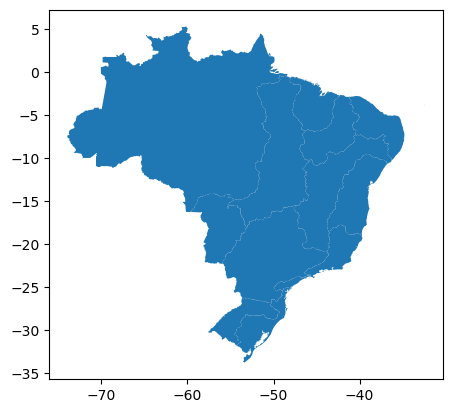

In [8]:
bacias.plot()

<AxesSubplot:>

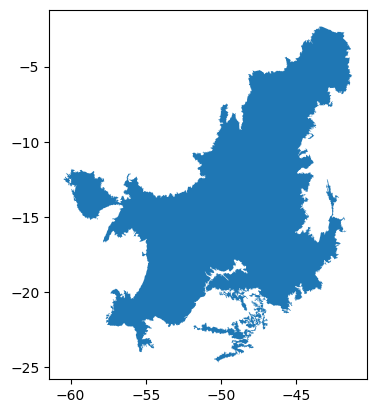

In [9]:
cerrado.plot()

In [10]:
bacias.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
cerrado.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
selecao = bacias['geometry']
posicao = []

for i in selecao.index:
    centroid = selecao[i].centroid
    central_coords = centroid.x, centroid.y
    posicao.append(central_coords)
    print(central_coords, 'adicionado')

(-60.46804815991247, -5.392990401251296) adicionado
(-49.47917563372345, -9.763651605727889) adicionado
(-45.40397555447033, -3.9644793083828342) adicionado
(-43.25541973161073, -7.19693347212241) adicionado
(-37.87040098025752, -6.195123212812888) adicionado
(-43.25201780467447, -13.448788220226888) adicionado
(-40.4226445573029, -14.373063191802418) adicionado
(-43.32684743618977, -21.28226004480107) adicionado
(-51.646050899440446, -29.57136063560493) adicionado
(-53.61037796216544, -28.58456547601367) adicionado
(-50.325225405658095, -21.400152227264066) adicionado
(-56.218173985672735, -17.88667003388208) adicionado


In [13]:
posicao

[(-60.46804815991247, -5.392990401251296),
 (-49.47917563372345, -9.763651605727889),
 (-45.40397555447033, -3.9644793083828342),
 (-43.25541973161073, -7.19693347212241),
 (-37.87040098025752, -6.195123212812888),
 (-43.25201780467447, -13.448788220226888),
 (-40.4226445573029, -14.373063191802418),
 (-43.32684743618977, -21.28226004480107),
 (-51.646050899440446, -29.57136063560493),
 (-53.61037796216544, -28.58456547601367),
 (-50.325225405658095, -21.400152227264066),
 (-56.218173985672735, -17.88667003388208)]

## Parte III: Analisando os dados

### # Plotando mapa com multiplas cores com as bacias hidrográficas e o Cerrado 

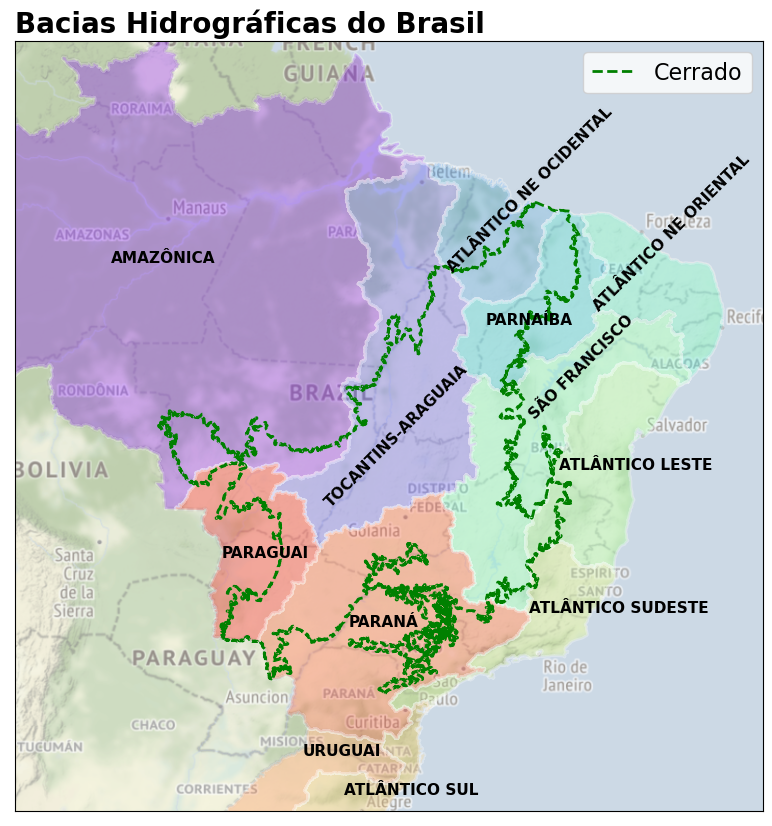

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))

bacias.plot(ax=ax, cmap='rainbow', edgecolor='white', linestyle='solid', linewidth=2, alpha=0.3)

cerrado.plot(ax=ax, color='None', edgecolor='green', linestyle='dashed', linewidth=2)

legenda_etiquetas_cerrado = ['Cerrado']
legenda_cerrado = [plt.Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, markersize=20)]
legenda = legenda_cerrado + legenda_etiquetas_cerrado
ax.legend(legenda, legenda_etiquetas_cerrado, loc='upper right', frameon=True, facecolor='white',
          prop={'size': 16})  # Adjust the font size here

ax.set_title('Bacias Hidrográficas do Brasil', fontsize=20, loc='left', weight='bold')

cx.add_basemap(ax, crs=bacias.crs, attribution=False, alpha=0.5)

ax.set_xticks([])
ax.set_yticks([])

xmin, xmax = -67, -33
ymin, ymax = -30, 5
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

positions = [(-60.46, -5.39),
             (-49.67, -15.96),
             (-43.40, -5.80),
             (-43.25, -7.30),
             (-36.57, -6.19),
             (-40.50, -10.60),
             (-37.82, -12.40),
             (-38.42, -18.37),
             (-47.64, -26.17),
             (-50.61, -23.88),
             (-48.52, -17.50),
             (-53.71, -13.88)]

offsets = [(3, 3), (0, -5), (-3, 3), (-6, -11), (-9, -19), (-12, -27), (-15, -35), (-18, -43),
           (-21, -51), (-24, -59), (-27, -67), (-30, -75)]

rotation_angles = [0, 45, 45, 0, 45, 45, 0, 0, 0, 0, 0, 0]

for idx, row in bacias.iterrows():
    position = positions[idx]
    offset = offsets[idx]
    rotation_angle = rotation_angles[idx]
    ax.annotate(text=row['nm_macroRH'], xy=position, xytext=offset, textcoords="offset points",
                ha='center', va='bottom', fontsize=11, rotation=rotation_angle, weight='bold')

plt.savefig('high_resolution_map.png', dpi=300)

plt.show()

### # Plotando mapa monocromático com as bacias hidrográficas e o Cerrado 

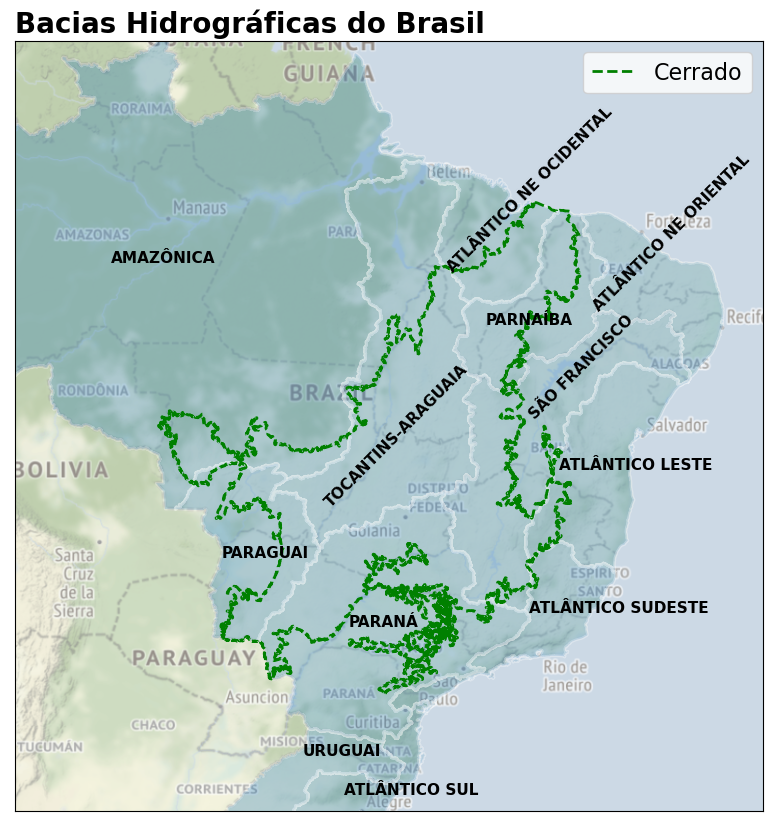

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))

bacias.plot(ax=ax, edgecolor='white', linestyle='solid', linewidth=2, alpha=0.3)

cerrado.plot(ax=ax, color='None', edgecolor='green', linestyle='dashed', linewidth=2)

legenda_etiquetas_cerrado = ['Cerrado']
legenda_cerrado = [plt.Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, markersize=20)]
legenda = legenda_cerrado + legenda_etiquetas_cerrado
ax.legend(legenda, legenda_etiquetas_cerrado, loc='upper right', frameon=True, facecolor='white',
          prop={'size': 16})  # Adjust the font size here

ax.set_title('Bacias Hidrográficas do Brasil', fontsize=20, loc='left', weight='bold')

cx.add_basemap(ax, crs=bacias.crs, attribution=False, alpha=0.5)

ax.set_xticks([])
ax.set_yticks([])

xmin, xmax = -67, -33
ymin, ymax = -30, 5
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

positions = [(-60.46, -5.39),
             (-49.67, -15.96),
             (-43.40, -5.80),
             (-43.25, -7.30),
             (-36.57, -6.19),
             (-40.50, -10.60),
             (-37.82, -12.40),
             (-38.42, -18.37),
             (-47.64, -26.17),
             (-50.61, -23.88),
             (-48.52, -17.50),
             (-53.71, -13.88)]

offsets = [(3, 3), (0, -5), (-3, 3), (-6, -11), (-9, -19), (-12, -27), (-15, -35), (-18, -43),
           (-21, -51), (-24, -59), (-27, -67), (-30, -75)]

rotation_angles = [0, 45, 45, 0, 45, 45, 0, 0, 0, 0, 0, 0]

for idx, row in bacias.iterrows():
    position = positions[idx]
    offset = offsets[idx]
    rotation_angle = rotation_angles[idx]
    ax.annotate(text=row['nm_macroRH'], xy=position, xytext=offset, textcoords="offset points",
                ha='center', va='bottom', fontsize=11, rotation=rotation_angle, weight='bold')

plt.savefig('high_resolution_map.png', dpi=300)

plt.show()

## Parte IV: Conclusão

### A maior parte das bacias hidrográficas do Brasil nascem (São Francisco, Tocantins-Araguaia, Atântico Nordeste Ocidental, Parnaíba) e são abastecidas (Amazônica, Paraguai, Paraná e etc) pelo bioma do Cerrado, o que mostra a importância desse bioma para a quesão hídrica no Brasil. 